In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data = pd.read_csv(r"/content/drive/My Drive/Indicators.csv")

print(data.shape)
print(data.head(10))

(5656458, 6)
  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   
5  Arab World         ARB        Arms imports (SIPRI trend indicator values)   
6  Arab World         ARB               Birth rate, crude (per 1,000 people)   
7  Arab World         ARB                                 CO2 emissions (kt)   
8  Arab World         ARB             CO2 emissions (metric tons per capita)   
9  Arab World         ARB  CO2 emissions from gaseous fuel consumption (%...   

       IndicatorCode  Year         Value  
0        SP.ADO.TFRT  1960  1.335609e+02  
1        SP.POP.DPND

In [ ]:
data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [ ]:
countries = data['CountryName'].unique().tolist()
len(countries)


247

In [ ]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)


247

In [ ]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)


1344

In [ ]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)


56

In [ ]:
print(min(years), " to ", max(years))


1960  to  2015


In [ ]:
hist_indicator1 = r'CO2 emissions \(metric'
hist_country1   = 'ARB'

mask11 = data['IndicatorName'].str.contains(hist_indicator1)
mask22 = data['CountryCode'].str.contains(hist_country1)

stage1 = data[mask11 & mask22]
print(stage1.head())

       CountryName CountryCode                           IndicatorName  \
8       Arab World         ARB  CO2 emissions (metric tons per capita)   
23204   Arab World         ARB  CO2 emissions (metric tons per capita)   
49821   Arab World         ARB  CO2 emissions (metric tons per capita)   
78260   Arab World         ARB  CO2 emissions (metric tons per capita)   
106885  Arab World         ARB  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year     Value  
8       EN.ATM.CO2E.PC  1960  0.643964  
23204   EN.ATM.CO2E.PC  1961  0.685501  
49821   EN.ATM.CO2E.PC  1962  0.761148  
78260   EN.ATM.CO2E.PC  1963  0.875124  
106885  EN.ATM.CO2E.PC  1964  0.999248  


In [ ]:
hist_indicator3 = r'CO2 emissions \(metric'
hist_country3   = 'BRB'
mask32 = data['IndicatorName'].str.contains(hist_indicator3)
mask42 = data['CountryCode'].str.contains(hist_country3)
stage3 = data[mask32 & mask42]
print(stage3.head())

       CountryName CountryCode                           IndicatorName  \
4812      Barbados         BRB  CO2 emissions (metric tons per capita)   
28743     Barbados         BRB  CO2 emissions (metric tons per capita)   
55693     Barbados         BRB  CO2 emissions (metric tons per capita)   
84086     Barbados         BRB  CO2 emissions (metric tons per capita)   
112785    Barbados         BRB  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year     Value  
4812    EN.ATM.CO2E.PC  1960  0.746313  
28743   EN.ATM.CO2E.PC  1961  0.838899  
55693   EN.ATM.CO2E.PC  1962  1.119411  
84086   EN.ATM.CO2E.PC  1963  0.816330  
112785  EN.ATM.CO2E.PC  1964  0.766085  


In [ ]:
hist_indicator2 = r'CO2 emissions \(metric'
hist_country2   = 'IND'
mask22 = data['IndicatorName'].str.contains(hist_indicator2)
mask32 = data['CountryCode'].str.contains(hist_country2)

stage2 = data[mask22 & mask32]

print(stage2.head())

       CountryName CountryCode                           IndicatorName  \
11577        India         IND  CO2 emissions (metric tons per capita)   
36513        India         IND  CO2 emissions (metric tons per capita)   
64049        India         IND  CO2 emissions (metric tons per capita)   
92493        India         IND  CO2 emissions (metric tons per capita)   
121290       India         IND  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year     Value  
11577   EN.ATM.CO2E.PC  1960  0.268161  
36513   EN.ATM.CO2E.PC  1961  0.284292  
64049   EN.ATM.CO2E.PC  1962  0.306519  
92493   EN.ATM.CO2E.PC  1963  0.322533  
121290  EN.ATM.CO2E.PC  1964  0.308900  


In [ ]:
hist_indicator4 = r'CO2 emissions \(metric'
hist_country4   = 'SGP'
mask42 = data['IndicatorName'].str.contains(hist_indicator4)
mask52 = data['CountryCode'].str.contains(hist_country4)
stage4 = data[mask42 & mask52]
print(stage4.head())

       CountryName CountryCode                           IndicatorName  \
18930    Singapore         SGP  CO2 emissions (metric tons per capita)   
44969    Singapore         SGP  CO2 emissions (metric tons per capita)   
73101    Singapore         SGP  CO2 emissions (metric tons per capita)   
101695   Singapore         SGP  CO2 emissions (metric tons per capita)   
130742   Singapore         SGP  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year     Value  
18930   EN.ATM.CO2E.PC  1960  0.846368  
44969   EN.ATM.CO2E.PC  1961  1.229944  
73101   EN.ATM.CO2E.PC  1962  1.472918  
101695  EN.ATM.CO2E.PC  1963  1.893765  
130742  EN.ATM.CO2E.PC  1964  2.011115  


In [ ]:
hist_indicator = r'CO2 emissions \(metric'
hist_country   = 'USA'
mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]
print(stage.head())

          CountryName CountryCode                           IndicatorName  \
22232   United States         USA  CO2 emissions (metric tons per capita)   
48708   United States         USA  CO2 emissions (metric tons per capita)   
77087   United States         USA  CO2 emissions (metric tons per capita)   
105704  United States         USA  CO2 emissions (metric tons per capita)   
134742  United States         USA  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year      Value  
22232   EN.ATM.CO2E.PC  1960  15.999779  
48708   EN.ATM.CO2E.PC  1961  15.681256  
77087   EN.ATM.CO2E.PC  1962  16.013937  
105704  EN.ATM.CO2E.PC  1963  16.482762  
134742  EN.ATM.CO2E.PC  1964  16.968119  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [ ]:
data.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [ ]:
 np.unique(data.dtypes, return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4]))

In [ ]:
cat = data.dtypes[data.dtypes == 'O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [ ]:
for i in cat:
     print("Column: ", i)
     print("Count of classes:", data[i].nunique())
     print(c(data[i]))
     print('*'*120)

Column:  CountryName
Count of classes: 247
Counter({'Mexico': 37244, 'Colombia': 37227, 'Philippines': 36912, 'Peru': 36815, 'Costa Rica': 36457, 'Thailand': 36355, 'Morocco': 36275, 'Indonesia': 36252, 'Malaysia': 35874, 'Turkey': 35819, 'Ecuador': 35788, 'Pakistan': 35768, 'India': 35721, 'Brazil': 35550, 'Egypt, Arab Rep.': 35367, 'Bolivia': 35307, 'Tunisia': 35302, 'Honduras': 35171, 'Guatemala': 35078, 'El Salvador': 34739, 'Kenya': 34621, 'Algeria': 34578, 'Cameroon': 34259, 'Dominican Republic': 34253, 'Jordan': 34050, 'Senegal': 33990, 'Panama': 33984, 'Nicaragua': 33638, 'Bangladesh': 33386, 'Sri Lanka': 33369, 'Togo': 33221, 'Iran, Islamic Rep.': 32966, 'Benin': 32965, 'Zambia': 32930, 'Madagascar': 32637, 'Burkina Faso': 32604, 'Congo, Rep.': 32310, 'Mauritius': 32285, 'Botswana': 32039, 'Jamaica': 31835, 'Rwanda': 31770, 'Ghana': 31730, 'Paraguay': 31423, 'Uganda': 31412, 'Nigeria': 31381, 'Congo, Dem. Rep.': 31257, 'Sudan': 31175, 'Latin America & Caribbean (developing onl

In [ ]:
data.dtypes[data.dtypes != 'O'].index.values

array(['Year', 'Value'], dtype=object)

In [ ]:
data.isnull().any()

,0
CountryName,False
CountryCode,False
IndicatorName,False
IndicatorCode,False
Year,False
Value,False


In [ ]:
data.isnull().sum()

,0
CountryName,0
CountryCode,0
IndicatorName,0
IndicatorCode,0
Year,0
Value,0


In [ ]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder
x='*'
for i in cat:
     print("LABEL ENCODING OF:", i)
     LE = LabelEncoder()
     print(c[data[i]])
     data[i]=LE.fit_transform(data[i])
     print(c[data[i]])
     print(x*100)

LABEL ENCODING OF: CountryName
collections.Counter[0          Arab World
1          Arab World
2          Arab World
3          Arab World
4          Arab World
              ...    
5656453      Zimbabwe
5656454      Zimbabwe
5656455      Zimbabwe
5656456      Zimbabwe
5656457      Zimbabwe
Name: CountryName, Length: 5656458, dtype: object]
collections.Counter[0            7
1            7
2            7
3            7
4            7
          ... 
5656453    246
5656454    246
5656455    246
5656456    246
5656457    246
Name: CountryName, Length: 5656458, dtype: int64]
****************************************************************************************************
LABEL ENCODING OF: CountryCode
collections.Counter[0          ARB
1          ARB
2          ARB
3          ARB
4          ARB
          ... 
5656453    ZWE
5656454    ZWE
5656455    ZWE
5656456    ZWE
5656457    ZWE
Name: CountryCode, Length: 5656458, dtype: object]
collections.Counter[0            5
1            5
2  

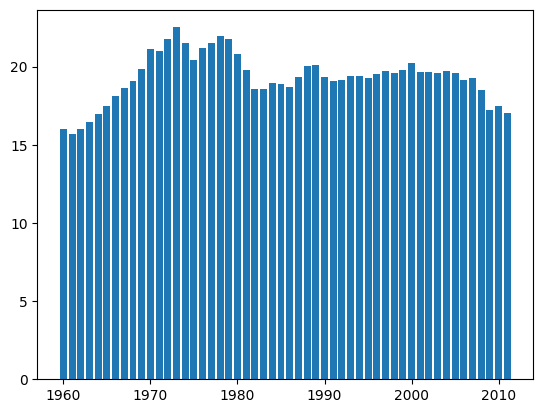

In [ ]:
years=stage['Year'].values
co2=stage['Value'].values
plt.bar(years,co2)
plt.show()

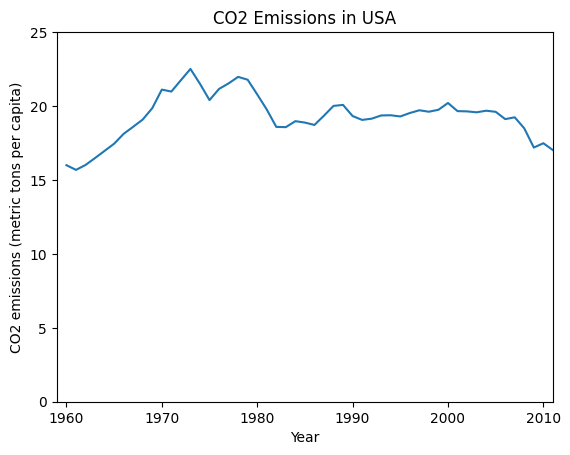

In [ ]:
plt.plot(stage['Year'].values, stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title('CO2 Emissions in USA')
plt.axis([1959, 2011,0,25])
plt.show()

In [ ]:
# Fix the file path by either:
# 1. Using raw string (r prefix)
data = pd.read_csv(r"/content/drive/My Drive/Indicators.csv")

# OR
# 2. Using forward slashes
# data = pd.read_csv("C:/Users/Mudit Choubey/OneDrive/Desktop/Indicators.csv")

# OR
# 3. Using double backslashes
# data = pd.read_csv("C:\\Users\\Mudit Choubey\\OneDrive\\Desktop\\Indicators.csv")

print("Shape:", data.shape)
print(data.head(10))

Shape: (5656458, 6)
  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   
5  Arab World         ARB        Arms imports (SIPRI trend indicator values)   
6  Arab World         ARB               Birth rate, crude (per 1,000 people)   
7  Arab World         ARB                                 CO2 emissions (kt)   
8  Arab World         ARB             CO2 emissions (metric tons per capita)   
9  Arab World         ARB  CO2 emissions from gaseous fuel consumption (%...   

       IndicatorCode  Year         Value  
0        SP.ADO.TFRT  1960  1.335609e+02  
1        SP.P

In [ ]:
print("Countries:", data['CountryName'].nunique())
print("Indicators:", data['IndicatorName'].nunique())
print("Years:", data['Year'].min(), "to", data['Year'].max())

Countries: 247
Indicators: 1344
Years: 1960 to 2015


In [ ]:
def get_indicator(df, indicator_regex, country_code):
    return (
        df[df['IndicatorName'].str.contains(indicator_regex, regex=True)]
        .loc[lambda d: d['CountryCode'] == country_code]
        .copy()
    )

In [ ]:
co2_regex = r'CO2 emissions \(metric'
gdp_regex = r'GDP per capita \(constant 2005'

usa_co2 = get_indicator(data, co2_regex, 'USA')
usa_gdp = get_indicator(data, gdp_regex, 'USA')

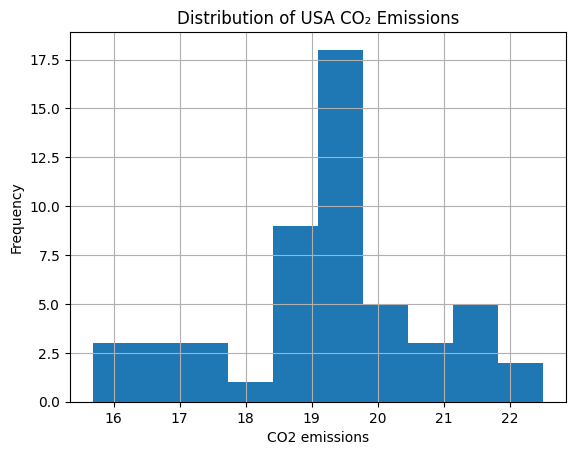

In [ ]:
plt.figure()
plt.hist(usa_co2['Value'], bins=10)
plt.xlabel('CO2 emissions')
plt.ylabel('Frequency')
plt.title('Distribution of USA CO₂ Emissions')
plt.grid(True)
plt.show()

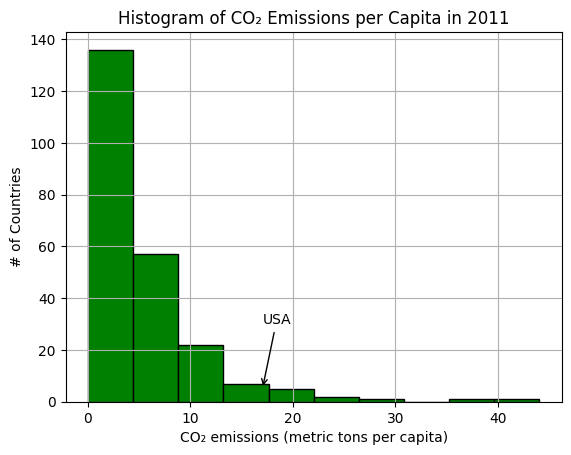

In [ ]:
# Let's plot a histogram of the emissions per capita by country

# subplots returns a tuple with the figure, axis attributes.
# fig, ax = plt.subplots()

# ax.annotate("USA",
#             xy=(18, 5), xycoords='data',
#             xytext=(18, 30), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#            )

# plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

# plt.xlabel(stage['IndicatorName'].iloc[0])
# plt.ylabel('# of Countries')
# plt.title('Histogram of CO2 Emissions Per Capita')

# # plt.axis([10, 22, 0, 14])
# plt.grid(True)

# plt.show()

co2_regex   = r'CO2 emissions \(metric'
year_target = 2011

# Filter for the indicator and the desired year
co2_2011 = (
    data[data['IndicatorName'].str.contains(co2_regex, regex=True)]
    .loc[lambda d: d['Year'] == year_target]
    .copy()
)

# Optional: keep only the columns we actually need
co2_2011 = co2_2011[['CountryName', 'CountryCode', 'Value']]

# 2️⃣  Plot the histogram
fig, ax = plt.subplots()

# Annotate one example (USA) just like in your original snippet
usa_val = co2_2011.loc[co2_2011['CountryCode'] == 'USA', 'Value'].values
if usa_val.size:
    ax.annotate(
        'USA',
        xy=(usa_val[0], 5),         # position of the arrow head
        xytext=(usa_val[0], 30),    # label position
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3')
    )

ax.hist(co2_2011['Value'], bins=10, facecolor='green', edgecolor='black')
ax.set_xlabel('CO₂ emissions (metric tons per capita)')
ax.set_ylabel('# of Countries')
ax.set_title(f'Histogram of CO₂ Emissions per Capita in {year_target}')
ax.grid(True)

plt.show()

In [ ]:
# select GDP per capita emissions for the United States
hist_indicator = 'GDP per capita \\(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

# plot gdp_stage vs stage

gdp_stage.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


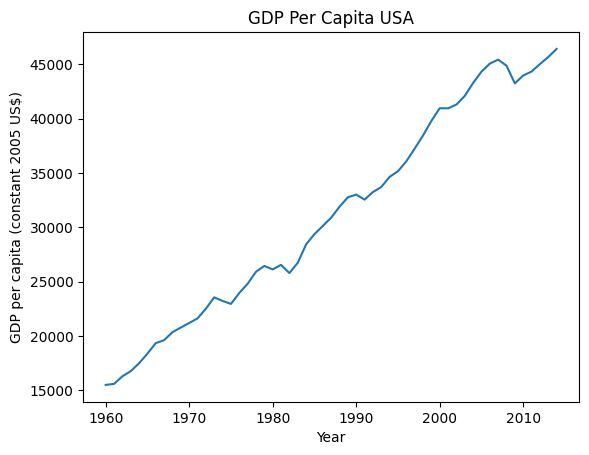

In [ ]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start the y axis at 0
# plt.axis([1959, 2011, 0, 25])

plt.show()


In [ ]:
# Align GDP and CO2 emissions data on the same years
common_years = set(gdp_stage['Year']) & set(stage['Year'])

gdp_stage_trunc = gdp_stage[gdp_stage['Year'].isin(common_years)].sort_values('Year')
stage = stage[stage['Year'].isin(common_years)].sort_values('Year')


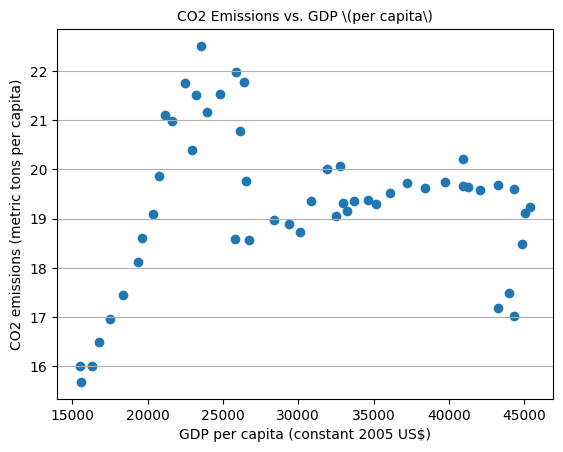

In [ ]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \\(per capita\\)', fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()


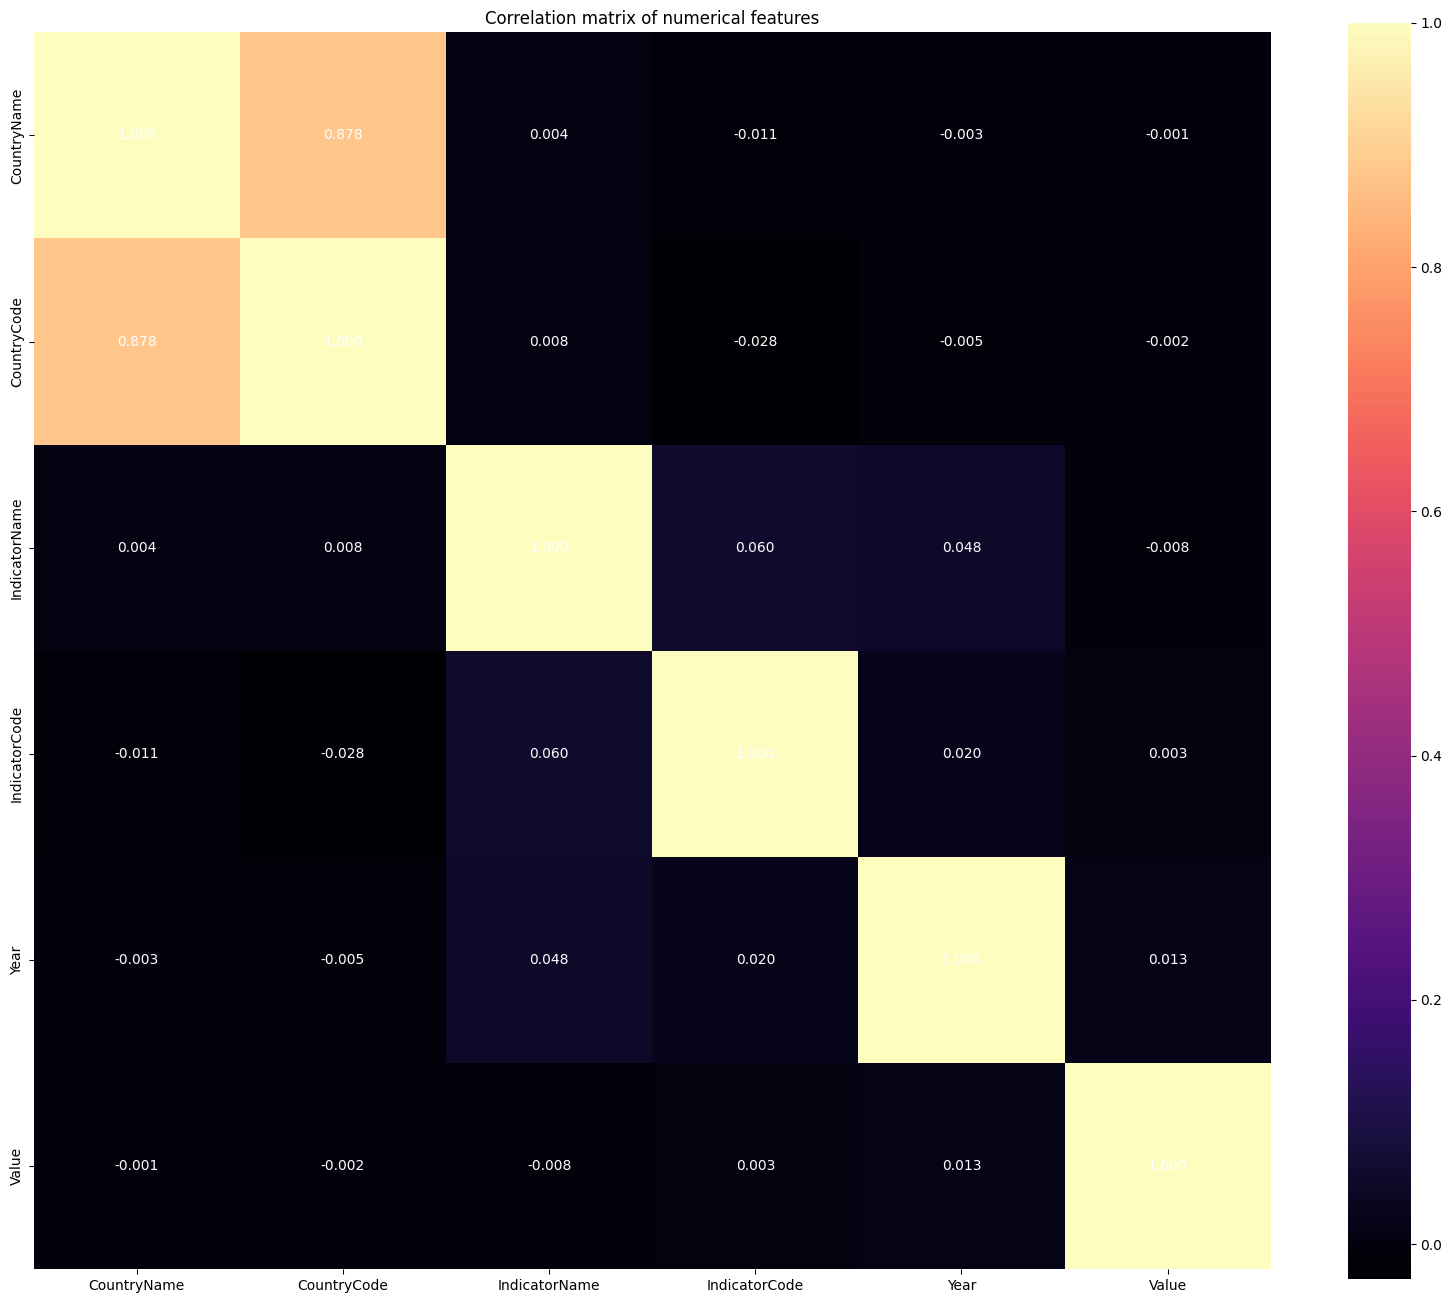

x_train shape: (4525166, 4)
x_test shape: (1131292, 4)
y_train shape: (4525166, 1)
y_test shape: (1131292, 1)


In [ ]:
# Load the dataset
data = pd.read_csv(r"/content/drive/My Drive/Indicators.csv")
# Alternative solutions:
# data = pd.read_csv("C:/Users/Mudit Choubey/OneDrive/Desktop/Indicators.csv")
# data = pd.read_csv("C:\\Users\\Mudit Choubey\\OneDrive\\Desktop\\Indicators.csv")

# Create a copy for correlation analysis and convert categorical columns to numeric
data_numeric = data.copy()

# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode']

for col in categorical_columns:
    if col in data_numeric.columns:
        le = LabelEncoder()
        data_numeric[col] = le.fit_transform(data_numeric[col].astype(str))
        label_encoders[col] = le

# Create correlation matrix
corr = data_numeric.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corr,
            annot=True,
            square=True,
            cmap='magma',
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 10, 'color': 'white'})
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

# Splitting the dataset into dependent and independent variables
# Fixed: 'value' should be 'Value' (capital V) to match your dataset
x = data_numeric.drop(['Value', 'IndicatorCode'], axis=1)
# Fixed: DataFrame spelling (capital D and F)
x = pd.DataFrame(x)
y = data_numeric['Value']  # dependent feature
y = pd.DataFrame(y)

# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# Extracting independent features
x = data.drop(['Value', 'IndicatorCode'], axis=1)
x = pd.DataFrame(x)

# Extracting dependent feature
y = data['Value']
y = pd.DataFrame(y)


In [ ]:
# --- Imports --------------------------------------------------------------
import time, json, pathlib, joblib, pandas as pd, numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

# ─── paths ─────────────────────────────────────────────────────────
ART = pathlib.Path("artifacts"); ART.mkdir(exist_ok=True)
MODEL_PKL   = ART / "co2_model_light.pkl"
METRICS_JS  = ART / "metrics.json"

# ─── config ────────────────────────────────────────────────────────
CPU_CORES   = 4
BASE_TREES  = 50        # very cheap for first halving round
MAX_TREES   = 600       # upper cap if OOB keeps improving
CHUNK       = 50        # warm-start step
SUB_FR      = 0.10      # 10 % rows for search
SEED        = 52

cat_cols = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode']
num_cols = ['Year']

t0 = time.time()
print("▶ load data …")
df = pd.read_csv("Indicators.csv")
X, y = df.drop("Value", axis=1), df["Value"]
print("   rows:", len(df))

# ─── sample for hyper-param search ─────────────────────────────────
from sklearn.model_selection import train_test_split
X_sub, _, y_sub, _ = train_test_split(X, y, train_size=SUB_FR,
                                      random_state=SEED)

# ─── pipeline for search ──────────────────────────────────────────
encoder = ColumnTransformer([
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value',
                           unknown_value=-1), cat_cols),
    ('num', 'passthrough', num_cols)
])

search_pipe = Pipeline([
    ('prep', encoder),
    ('rf',  RandomForestRegressor(
              n_estimators=BASE_TREES,
              max_samples=0.6,          # ↓ RAM
              oob_score=True,
              n_jobs=CPU_CORES,
              random_state=SEED))
])

param_dist = {
    "rf__max_depth"       : [None, 12, 18],
    "rf__min_samples_leaf": [1, 3],
    "rf__max_features"    : ["sqrt"],
}

print("▶ Hyper-param search …")
search = HalvingRandomSearchCV(
    search_pipe, param_dist,
    factor=3, resource='rf__n_estimators',
    max_resources=BASE_TREES,  # stays 50 in all rounds (cheap)
    min_resources=BASE_TREES,
    cv=2, n_jobs=CPU_CORES, random_state=SEED,
    scoring='r2', verbose=2)
search.fit(X_sub, y_sub)
print("best params:", search.best_params_,
      "CV R²:", f"{search.best_score_:.3f}")

# ─── final warm-start forest with OOB early-stop ───────────────────
best = {k.replace("rf__", ""): v for k, v in search.best_params_.items()}
best.update(dict(max_samples=0.6, oob_score=True,
                 warm_start=True, n_jobs=-1, random_state=SEED,
                 n_estimators=0))

rf = RandomForestRegressor(**best)
pipe = Pipeline([('prep', encoder), ('rf', rf)])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

print("▶ growing forest in 50-tree blocks (early-stop on OOB)…")
oob_prev = -1
for n in range(CHUNK, MAX_TREES + CHUNK, CHUNK):
    rf.set_params(n_estimators=n)
    pipe.fit(X_train, y_train)
    oob = rf.oob_score_
    print(f"   {n:3d} trees  |  OOB R² = {oob:.4f}")
    if n >= 150 and (oob - oob_prev) < 0.002:   # plateau
        print("   ↳ OOB gain < 0.002 → stop early")
        break
    oob_prev = oob

# ─── metrics ───────────────────────────────────────────────────────
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return {"R2": r2_score(y_true, y_pred),
            "MAE": mean_absolute_error(y_true, y_pred),
            "RMSE": np.sqrt(mse)}

val  = metrics(y_train, pipe.predict(X_train))
test = metrics(y_test,  pipe.predict(X_test))
print("train:", val, "\ntest :", test)

json.dump({"val": val, "test": test}, open(METRICS_JS, "w"), indent=2)
joblib.dump(pipe, MODEL_PKL, compress=3)
print("✓ saved", MODEL_PKL, "   ⏱", f"{time.time()-t0:.1f}s total")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
